In [5]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

# Разработка 
Этот сценарий состоит из двух частей.
1. Знакомство с выводами EDA и внесение соответствующих изменений.
2. Сгруппировать пользователей, рекламу, приложения и устройства и посмотреть, есть ли какие-нибудь новые функции, которые имеют смысл.

# Загрузка данных

In [18]:
data_dir = "./data/sampled_data.csv/"

df = pd.DataFrame()
for file in os.listdir(data_dir):    
    if file[-3:] == "csv":
        df = pd.concat((df,pd.read_csv(os.path.join(data_dir,file))),axis=0)

## Transform Data

In [19]:
df["start_communication_onlinerate"] = df["communication_onlinerate"].str.split("^",expand=True)[0]
df["last_communication_onlinerate"] = df["communication_onlinerate"].str.split("^").str[-1].replace(0,24)
df["duration_communication_onlinerate"] = df["last_communication_onlinerate"].astype(int)\
                                        - df["start_communication_onlinerate"].astype(int)
df["duration_communication_onlinerate"] = df["duration_communication_onlinerate"].astype(str)

In [20]:
user_features = ["age",                 
                 #city,
                 "city_rank",
                 "residence",
                 "career",
                 "gender",
                 "up_life_duration",
                 "up_membership_grade",
                 "membership_life_duration",
                 "consume_purchase",
                 "duration_communication_onlinerate",
                 "communication_avgonline_30d"
                ]
ads_features = ["creat_type_cd",
                "adv_prim_id",
                "dev_id",
                "inter_type_cd",
                "slot_id",
                "indu_name"]
app_features = ["tags",
                "app_first_class",
                "app_second_class",
                "his_app_size",
                "his_on_shelf_time",
                "app_score"]
device_features = ["device_size",
                   "emui_dev",
                   "list_time",
                   "device_price"]
event_features = ["net_type",
                  "pt_d"]

In [21]:
selected_features = user_features + ads_features + app_features + device_features + event_features

## Сегментирование обучающей выборки

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(df[selected_features], df['label'],test_size=0.25,random_state=0)

In [8]:
X_train

,age,city_rank,residence,career,gender,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,duration_communication_onlinerate,...,app_second_class,his_app_size,his_on_shelf_time,app_score,device_size,emui_dev,list_time,device_price,net_type,pt_d
6257,6,5,23,7,2,20,1,-1,2,20,...,26,5,3,2,162,20,4,5,3,5
5664,4,5,12,9,4,16,-1,-1,2,22,...,23,-1,-1,1,141,14,8,4,3,6
7590,6,3,20,6,2,18,-1,-1,2,23,...,25,9,3,2,141,19,12,2,2,3
8532,7,4,30,6,2,-1,-1,-1,2,17,...,21,14,3,2,117,20,9,3,2,7
7771,6,3,29,4,2,20,-1,-1,2,23,...,21,4,3,2,162,20,4,4,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,7,4,46,9,2,18,-1,-1,2,23,...,21,4,3,2,117,20,15,3,2,5
14689,7,3,14,9,2,18,-1,-1,2,19,...,21,4,2,2,141,14,10,2,2,2
14364,5,3,14,4,2,20,1,-1,2,16,...,17,4,3,2,193,17,14,4,2,1
6108,5,5,20,4,2,20,-1,-1,10,17,...,17,2,3,2,297,27,17,5,2,6


## Распределение по группам click/not click

## Возможности взаимодействия

## кластеризация

In [9]:
from sklearn.cluster import KMeans

In [12]:
# train_df = enc.fit_transform(X_train)

In [32]:
Sum_of_squared_distances = []
for k in range(2,11):
    print(k)
    km = KMeans(n_clusters=k)
    km = km.fit(train_df)
    Sum_of_squared_distances.append(km.inertia_)

2
3
4
5
6
7
8
9
10


In [33]:
import matplotlib.pyplot as plt

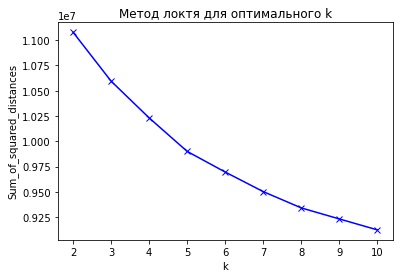

In [34]:
plt.plot(range(2,11), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Метод локтя для оптимального k')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',max_iter=1000000)

In [14]:
lr.fit(X_train, Y_train) 

LogisticRegression(max_iter=1000000)

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [17]:
#predicting the test set results
y_pred=lr.predict(X_test) 

In [51]:
y_pred

array([[1.00000000e+000, 3.69989173e-034],
       [1.00000000e+000, 2.31414488e-077],
       [7.61650076e-010, 9.99999999e-001],
       ...,
       [1.00000000e+000, 8.90222126e-071],
       [1.00000000e+000, 1.62494738e-115],
       [1.00000000e+000, 5.02529161e-079]])

In [18]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(Y_test, y_pred)
cm

array([[202127,      0],
       [  7179,      0]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9657009354724662

# SGD with LR

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

In [65]:
clf = SGDClassifier(loss='log', penalty=None, fit_intercept=True, learning_rate='constant', eta0=0.01)
clf = clf.fit(X_train, Y_train)

In [66]:
clf.score(X_train, Y_train)

0.9654093859688239

In [67]:
y_pred = clf.predict(X_test)

In [68]:
confusion_matrix(Y_test, y_pred)

array([[202127,      0],
       [  7179,      0]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report

In [70]:
cr = classification_report(Y_test, y_pred)
print(cr)

C:\Users\irina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    202127
           1       0.00      0.00      0.00      7179

    accuracy                           0.97    209306
   macro avg       0.48      0.50      0.49    209306
weighted avg       0.93      0.97      0.95    209306



In [71]:
clf.score(X_test, Y_test)

0.9657009354724662

## Random Forest

In [74]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [75]:
params = {'max_depth': [3, 10, None]}
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=30,
                                                 n_jobs=-1)
grid_search = GridSearchCV(random_forest_model, params, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [78]:
random_forest_final = grid_search.best_estimator_

In [80]:
probs = random_forest_final.predict_proba(X_test)[:, 1]
score = roc_auc_score(Y_test, probs)
print(format(score))

0.6793927470059083


## DECISION TREE

In [81]:

from sklearn.tree import DecisionTreeClassifier

In [82]:
params = {'max_depth': [3, 10, None]}
decision_tree_model = DecisionTreeClassifier(criterion='gini',
                                                 min_samples_split=30)

In [83]:
grid_search = GridSearchCV(decision_tree_model, params, n_jobs=-1, cv=3, scoring='roc_auc')    

In [85]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [86]:
decision_tree_final = grid_search.best_estimator_

In [88]:
prob = decision_tree_final.predict_proba(X_test)[:, 1]
score = roc_auc_score(Y_test, prob)
print(format(score))

0.6666990927444283


## XGBoost

In [30]:
import xgboost

In [32]:
xgb_model = xgboost.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1)
hr_pred = xgb_model.fit(X_train._get_numeric_data(), np.ravel(Y_train, order='C')).predict(X_test._get_numeric_data())

[12:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nrounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
score = roc_auc_score(Y_test, hr_pred)
print(format(score))

0.5004479540060809


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

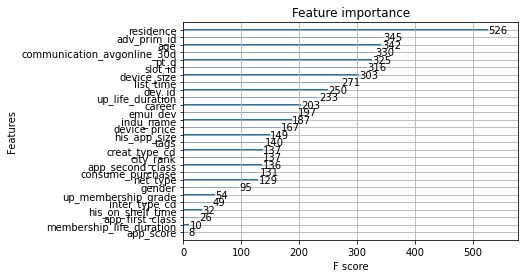

In [105]:
xgboost.plot_importance(xgb_model) # график важности признаков